# 5003 HW3

## ZHANG Juntao - 20908272

Some required packages

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import integrate
import matplotlib.pyplot as plt
import scipy.stats as st

### 1. Problem A

#### 1.1 Find the closed-form expression of the autocorrelation for signal $S_{0}(y)$. 

Firstly, we have:

$
\begin{aligned}
&S_0(y)=\left\{\begin{array}{cc}
\sin (2 \pi y), & y \in[-3,3] \\
0, & \text { otherwise }
\end{array}\right. \\
&S_0(x+y)=\left\{\begin{array}{cc}
\sin [2 \pi(x+y)], & x+y \in[-3,3] \\
0, & \text { otherwise }
\end{array}\right.
\end{aligned}
$

Thus, $S_0(y) \cdot S_0(x+y) \neq 0$, when $y \in[-3,3]$ and $x+y \in[-3,3]$, from where we can get $x \in[-6,6]$.

Then determine the interval of $y$ based on the value of $x$, we have:

$y \in[-3-x, 3]$, when $x \in[-6,0]$.

$y \in[-3,3-x]$, when $x \in[0,6]$.

Therefore, when $x \in [-6, 0]$
$$
\begin{aligned}
\int_{-3}^3 S_0(y) \cdot S_0(x+y) d y &=\int_{-3-x}^3 \sin (2 \pi y) \cdot \sin (2 \pi x+2 \pi y) d y \\
&=\frac{\sin 2 \pi x}{2} \int_{-3}^3 \sin 4 \pi y d y+\frac{\cos 2 \pi x}{2}(6+x)-\frac{\cos 2 \pi x}{2} \int_{-3-x}^3 \cos 4 \pi y d y \\
&=\frac{\sin 2 \pi x}{8 \pi}[\cos (12 \pi+4 \pi x)-1]+\frac{\cos 2 \pi x}{2}(6+x)-\frac{\cos 2 \pi x}{8 \pi} \sin (12 \pi+4 \pi x)
\end{aligned}
$$

And when $x \in[0,6]$
$$
\begin{aligned}
\int_{-3}^3 S_0(y) \cdot S_0(x+y) d y &=\int_{-3}^{3-x} \sin (2 \pi y) \cdot \sin (2 \pi x+2 \pi y) d y \\
&=\frac{\sin 2 \pi x}{2} \int_{-3}^{3-x} \sin 4 \pi y d y+\frac{\cos 2 \pi x}{2}(6-x)-\frac{\cos 2 \pi x}{2} \int_{-3}^{3-x} \cos 4 \pi y d y \\
&=\frac{\sin 2 \pi x}{8 \pi}[1-\cos (12 \pi-4 \pi x)]+\frac{\cos 2 \pi x}{2}(6-x)-\frac{\cos 2 \pi x}{8 \pi} \sin (12 \pi-4 \pi x)
\end{aligned}
$$

Otherwise, 
$\int_{-3}^3 S_0(y) \cdot S_0(x+y) d y = 0$

We get the closed-form expression of the given signal's autocorrelation from the above results.

#### 1.2 Perform simulation to get the numerical result

And compare the numerical result with the theoretical result.

##### Define some needed functions

In [179]:
def S0(x):
    if -3 <= x <= 3:
        return np.sin(2 * np.pi * x)
    else:
        return 0
    
def P(x):
    if -3 <= x <= 3:
        return np.sin(20 * np.pi * x)
    else:
        return 0
    
def S(x):
    return S0(x)+P(x)

def r(y, sigma):
    return (np.exp(-y**2/(2*sigma**2)))/(math.sqrt(2*np.pi*sigma**2))

def Theo_S0(y):
    if -6 <= y <= 0:
        a = np.sin(2*np.pi*y)*(np.cos(12*np.pi+4*np.pi*y)-1)/(8*np.pi)
        b = np.cos(2*np.pi*y)*(6+y)/2
        c = np.cos(2*np.pi*y)*np.sin(12*np.pi+4*np.pi*y)/(8*np.pi)
        return a+b-c
    
    elif 0 <= y <= 6:
        a = np.sin(2*np.pi*y)*(-np.cos(12*np.pi-4*np.pi*y)+1)/(8*np.pi)
        b = np.cos(2*np.pi*y)*(6-y)/2
        c = np.cos(2*np.pi*y)*np.sin(12*np.pi-4*np.pi*y)/(8*np.pi)
        return a+b-c
    
    else:
        return 0

##### Visualize signal $S_{0}$

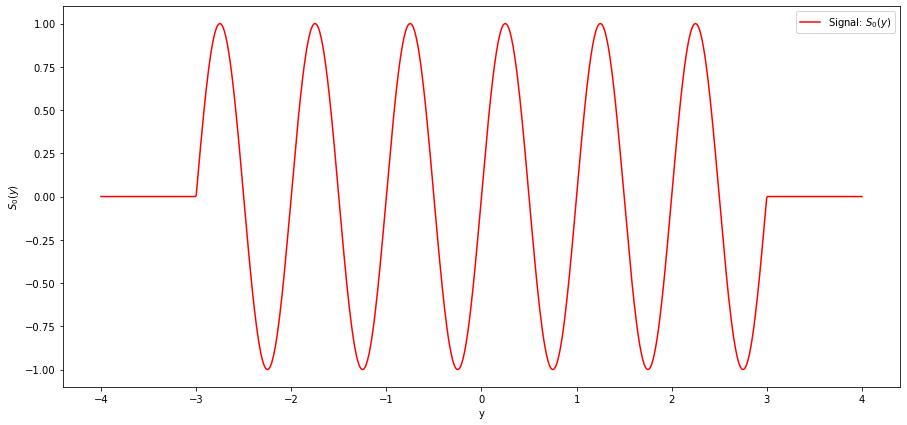

In [151]:
x = np.linspace(-4,4,1000)
s0 = []
for i in range(len(x)):
    s0.append(S0(x[i]))

plt.figure(figsize = (15,7))
plt.plot(x, s0, color='red', label='Signal: $S_{0}(y)$')
plt.ylabel('$S_{0}(y)$')
plt.xlabel('y')
plt.legend()
plt.show()

##### Get numerical and theoretical autocorrelation and compare them

- scipy.integrate.quad 

Use above function to calculate the integral.

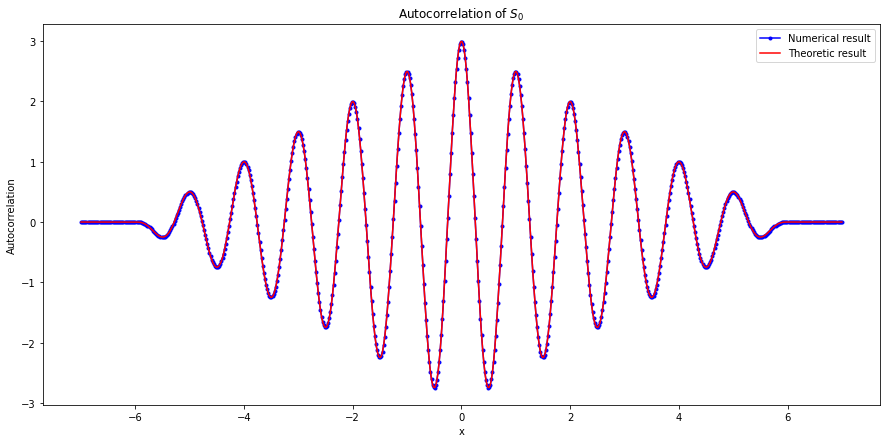

In [159]:
x0 = np.linspace(-7,7,700)
Acc = []
theoretic = []
for i in range(len(x0)):
    def P1(x):
        return S0(x) * S0(x+x0[i])
    res, err = integrate.quad(P1, -3, 3)
    Acc.append(res)
    theoretic.append(Theo_S0(x0[i]))
    

plt.figure(figsize = (15,7))
plt.plot(x0, Acc, color='blue', marker='.', label = 'Numerical result')
plt.plot(x0, theoretic, color='red',label = 'Theoretic result')
plt.legend()
plt.ylabel('Autocorrelation')
plt.xlabel('x')
plt.title('Autocorrelation of $S_{0}$')
plt.show()

##### Conclusion

As we can see from the above figure, the numerical result obtained from the simulation perfectly agrees with the theoretical result obtained from the closed-form expression.

### 2. Problem B

##### Visualize signal $S(y) = S_{0}(y) + P(y)$

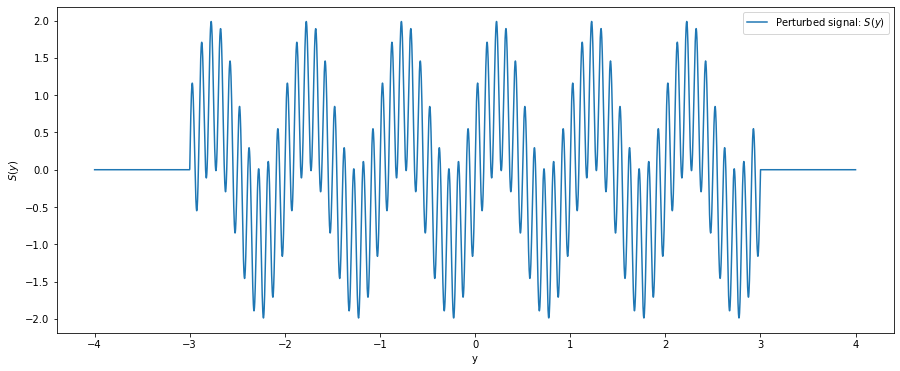

In [191]:
x = np.linspace(-4,4,5000)
s = []
for i in range(len(x)):
    s.append(S(x[i]))
    
plt.figure(figsize = (15,6))
plt.plot(x, s, label='Perturbed signal: $S(y)$')
plt.ylabel('$S(y)$')
plt.xlabel('y')
plt.legend()
plt.show()

#### Calculate the convolution $(s * r)(x)=\int_{-\infty}^{\infty} s(y) r(x-y) d y$ 

For the perturbed signal $s$ and a response function $r$ given by $r(x)=\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{x^2}{2 \sigma^2}}$ with $\sigma=0.2$.

From the property of Gaussian pdf and $"3 \sigma  Rule"$, we know the integrand of the convolution integral can be considered to vanish when we move away from the mean of the Gaussian by 3 standard deviations.

So $(s * r)(x)\neq 0$ when $y \in[-3, 3]$ and $x-y \in[-3\sigma,3\sigma]$, from where we can get $x \in[-3-3\sigma,3+3\sigma]$

i.e. $(s * r)(x)\neq 0$ when $x \in[-3-3\sigma,3+3\sigma]$.

Besides, the the lower and upper limits of the integral are $x-3\sigma$ and $x+3\sigma$, respectively.

#### 2.1 Numerical result of convolution with response function $r (\sigma=0.2)$

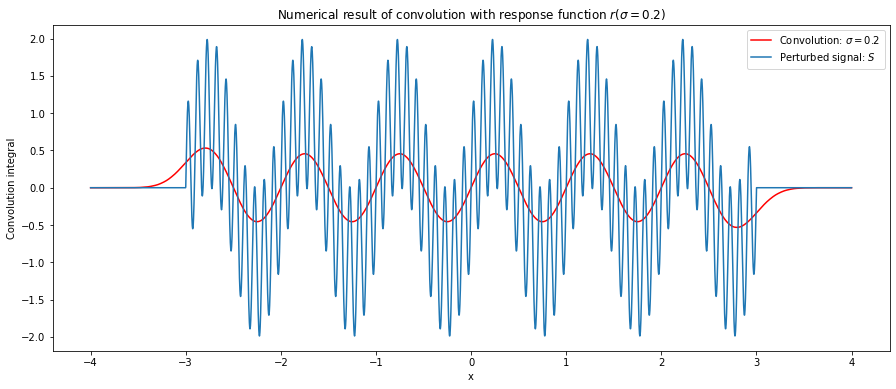

In [204]:
x1 = np.linspace(-4, 4, 5000)
Con = []
for i in range(len(x1)):
    def Conv(y):
        return S(y)*r(-y+x1[i], sigma=0.2)
    res1, err1 = integrate.quad(Conv, -3*0.2+x1[i], 3*0.2+x1[i])
    Con.append(res1)

plt.figure(figsize = (15,6))
plt.plot(x1, Con, color='red',label='Convolution: $\sigma=0.2$')
plt.plot(x, s, label='Perturbed signal: $S$')
plt.legend()
plt.xlabel('x')
plt.ylabel('Convolution integral')
plt.title('Numerical result of convolution with response function $r (\sigma=0.2)$')
plt.show()   

##### Conclusion

As the above figure shows, we successfully extract the feature from the perturbed signal through convolution.

#### 2.2 Numerical result of convolution with response function $r$ (with different $\sigma$)

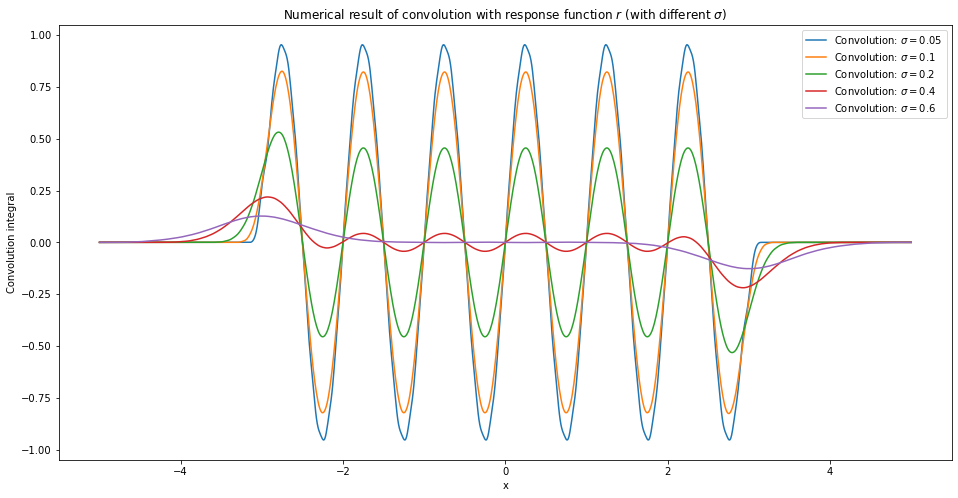

In [205]:
plt.figure(figsize = (16,8))

x1 = np.linspace(-5, 5, 1000)
Con = []
for i in range(len(x1)):
    def Conv(y):
        return S(y)*r(-y+x1[i], sigma=0.05)
    res1, err1 = integrate.quad(Conv, -3*0.05+x1[i], 3*0.05+x1[i])
    Con.append(res1)
plt.plot(x1, Con, label='Convolution: $\sigma=0.05$')

x1 = np.linspace(-5, 5, 1000)
Con = []
for i in range(len(x1)):
    def Conv(y):
        return S(y)*r(-y+x1[i], sigma=0.1)
    res1, err1 = integrate.quad(Conv, -3*0.1+x1[i], 3*0.1+x1[i])
    Con.append(res1)
plt.plot(x1, Con, label='Convolution: $\sigma=0.1$')


x1 = np.linspace(-5, 5, 1000)
Con = []
for i in range(len(x1)):
    def Conv(y):
        return S(y)*r(-y+x1[i], sigma=0.2)
    res1, err1 = integrate.quad(Conv, -3*0.2+x1[i], 3*0.2+x1[i])
    Con.append(res1)
plt.plot(x1, Con, label='Convolution: $\sigma=0.2$')

x1 = np.linspace(-5, 5, 1000)
Con = []
for i in range(len(x1)):
    def Conv(y):
        return S(y)*r(-y+x1[i], sigma=0.4)
    res1, err1 = integrate.quad(Conv, -3*0.4+x1[i], 3*0.4+x1[i])
    Con.append(res1)
plt.plot(x1, Con, label='Convolution: $\sigma=0.4$')

x1 = np.linspace(-5, 5, 1000)
Con = []
for i in range(len(x1)):
    def Conv(y):
        return S(y)*r(-y+x1[i], sigma=0.6)
    res1, err1 = integrate.quad(Conv, -3*0.6+x1[i], 3*0.6+x1[i])
    Con.append(res1)
plt.plot(x1, Con, label='Convolution: $\sigma=0.6$')


plt.legend()
plt.xlabel('x')
plt.ylabel('Convolution integral')
plt.title('Numerical result of convolution with response function $r$ (with different $\sigma$)')
plt.show()   

##### Conclusion

We can conclude that the peak value decreases and the convolution become smoother with $\sigma$ increase.